## Hello !!

This notebook is sort of a start on important concepts in Machine Learning like 

1)Feature Selection

2)Model selection

3)Input validation

....

Excuus vooraf half Nederlands/Engels document.


In [5]:
# Import nodige modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')


### Opdracht 1: 
Gebruik pandas (pd) om het bestand diabetes.csv in te lezen en toe te kennen aan diab variabele. 

In [6]:
import pandas as pd

diab = pd.read_csv("diabetes.csv", sep=",")


### Opdracht 2:
Check de data zijn alle records in de tabel juist.
Maak drie tests in python om te zien of de data correct is. 

TIP: het pandas object heeft hiervoor ook een aantal ingebouwde functies. (desscribe())

In [7]:
diab.describe()

check_nan_in_df = diab.isnull().values.any()
print(check_nan_in_df)

False


### Opdracht 3:

Hoeveel gevallen van diabetes zijn er?
Is het volgens jouw een probleem dat er een verschil is tussen het aantal diabetes gevallen en geen diabetes?
Kan je een uitspraak doen over het aantal mannen?

Reken de waarden hieronder uit.


In [8]:
diabetes = diab.loc[diab['Outcome'] == 1]
amount_diabetes = len(diabetes)

no_diabetes = diab.loc[diab['Outcome'] == 0]
amount_no_diabetes = len(no_diabetes)

print(f"People with diabetes: {amount_diabetes}")
print(f"People without diabetes: {amount_no_diabetes}")

# Er zijn veel minder mensen met diabetes in deze dataset
# als je deze dataset wil gebruiken om diabetes te herkennen zijn
# er waarschijnlijk meer cases nodig

# Je kan geen concreet onderscheid maken tussen mannen en vrouwen.

People with diabetes: 268
People without diabetes: 500


### Een korte analyse.

Bekijk de onderstaande plots, valt er iets op? 

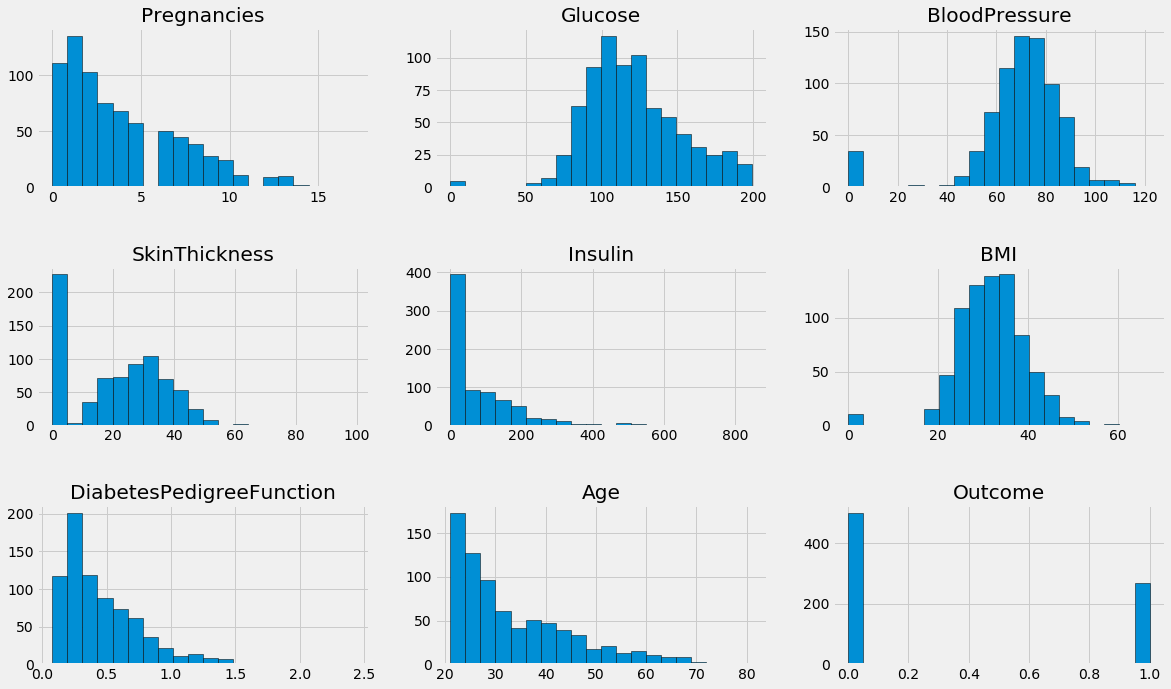

In [9]:
columns=diab.columns[:9]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

# 1) Het lijkt er op dat sommige kollomen als waarde 0 hadden.
#    Bijv: glucose, bloodpressure, SkinThickness, Insulin, BMI 
# 2) Er zijn vooral redelijk jonge mensen opgenomen in de dataset. Vooral van 20 tot 30
# 3) Bloed druk is voor sommige mensen heel erg laag, kan dat uberhaupt?

Wat valt er op?




### Opgave 5:

Doe de zelfde test maar selecteer nu alleen op de gevallen met diabetes. Is er een verschill met de plots waarin alle gevallen staan. Geef een motivatie? 

Bevatten sommige kolommen ongeldige waarden?

Repareer de tabel zo dat er geen nul waarden instaan? 

Welke waarde zou je kiezen als vervanging van de nul waarden?


TIP: Maak eerst een tabel met alleen de diabetes gevallen. 

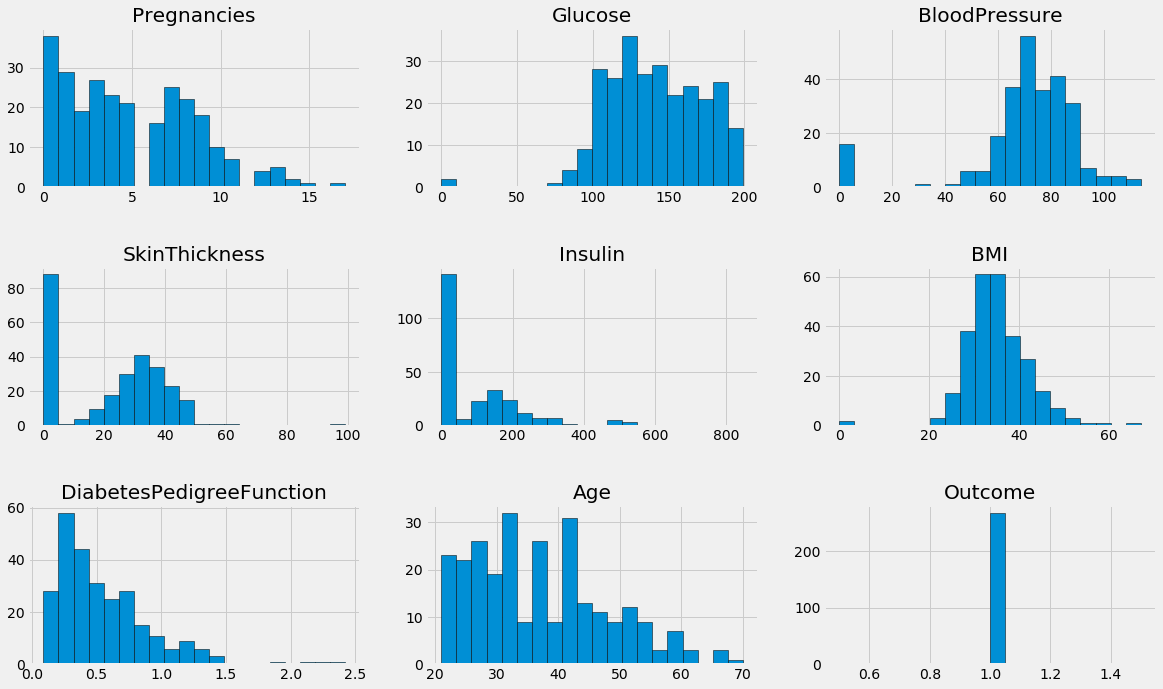

In [10]:
diabetes_cases = diab.loc[diab["Outcome"] == 1]

# & 
#     (diab["Glucose"] != 0) &
#     (diab["BloodPressure"] != 0) &
#     (diab["SkinThickness"] != 0) &
#     (diab["Insulin"] != 0) &
#     (diab["BMI"] != 0)

columns=diabetes_cases.columns[:9]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diabetes_cases[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Laten we eens wat voorspellen!

Gevraagd bekijk van eenieder hierondergenoemde classifier de mediawiki pagina. 
Welke denk je dat voor ons probleem het meeste geschikt is en waarom?


Wat zijn de verschillen tussen de clasifier?

Om welke reden zou je een bepaalde clasifier keizen?
.
.
.
.
.
.
.
.



In [11]:
# Importeen aantal standaard systeem voor machine-learning

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Opdracht 6:

Zoek uit wat er in het onderstaande blok gebeurt, geef hieronder de beschijving:

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

In [12]:
# De code hieronder is absuluut noodzakelijk voor een ML training.

outcome=diab['Outcome']
data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [13]:
train_X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
453,2,119,0,0,0,19.6,0.832,72


In [14]:
train_Y.head(2)

432    0
453    0
Name: Outcome, dtype: int64

### SVM

In [15]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.765625
Accuracy for SVM kernel= linear is 0.7708333333333334


### Logistic Regression

In [16]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.78125


### Opdracht :
Maak voor de decision tree classifier een getraind model en test de nauwkeurigheid.



In [17]:
model=DecisionTreeClassifier()

model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Decision Tree is 0.7708333333333334


### Alle systemen op een rijtje.


In [18]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.770833
Radial Svm,0.765625
Logistic Regression,0.781250
KNN,0.729167
Decision Tree,0.750000


The above algorithms are not giving vey high accuracy. This can be improved by using Feature Selection and using only relevant features. We can also use ensembling or averaging of different algorithms. I will do these things in subsequent parts.

## Feature Extraction/ Selection:
1)A lot many features can affect the accuracy of the algorithm.

2)Feature Extraction means to select only the important features in-order to improve the accuracy of the algorithm.

3)It reduces training time and reduces overfitting

4)We can choose important features in 2 ways:

a)Correlation matrix--> selecting only the uncorrelated features.

b)RandomForestClassifier--> It gives the importance of the features

### Correlation Matrix

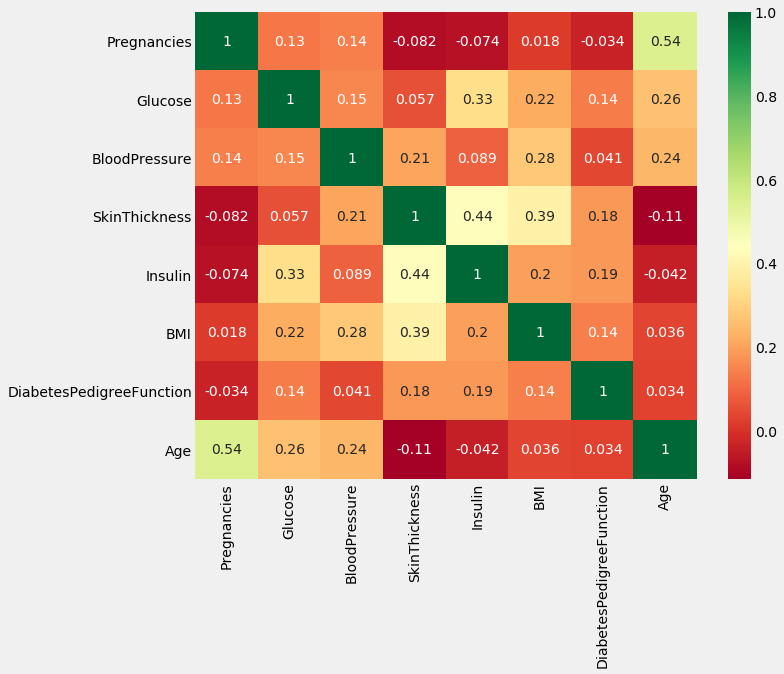

In [19]:
sns.heatmap(diab[diab.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Vraag: Wat zie je in de correlatie matrix zegt het iets over de features, en zo ja wat?

In [20]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

### Gevraagd :Observations:

Wat betekenen de verschillende getallen in de velden. Wat is een  correlatie matrix?

<br> De getallen betekenen hoe belangrijk de features zijn ten opzichte van de uitkomst of je diabetes hebt.



### Vraag wat zijn volgens jouw de belangrijkste features voor het bepalen van diabetes?

<br>Bij het vergelijken van de corrolatie matrix en de random forest classifier komen. Glucose, BMI en leeftijd allebij sterk naar voren.



### Opdracht x:

Selecteer uit de dataset nu alleen de belangrijkste features en train en test de voorgaande modelen. 
Zijn de resultaten op de naukeurigheid toegenomen of juist niet?


In [ ]:
# Maak nu op basis van het nieuw getraind model een kleine app(in het notebook) 
# dat vraagt om de features en voorspelt of er sprake is van diabetes.

# Succes.

diabfeatures = diab[['Glucose','Age','BMI','Outcome']]

outcome=diabfeatures['Outcome']
data=diabfeatures[diabfeatures.columns[:3]]
train,test=train_test_split(diabfeatures,test_size=0.25,random_state=0,stratify=diabfeatures['Outcome'])# stratify the outcome
train_X=train[train.columns[:3]]
test_X=test[test.columns[:3]]
train_Y=train['Outcome']
test_Y=test['Outcome']

abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe   

# Laatste opdracht: bewaar dit notebook op je persoonlijke gitlab project in een folder genaamd bootcamp/notebooks